In [2]:
from akshare import stock_zh_index_daily_em
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 数据集准备
# 通过接口获取2000年-2019年A股中兴通讯的深交所指数
dataset = stock_zh_index_daily_em(symbol="sz000063",start_date="20000101",end_date="20191231")
print(dataset)

            date   open  close   high    low   volume        amount
0     2000-01-04  28.60  29.89  30.50  28.55    15639  4.660794e+07
1     2000-01-05  29.81  29.54  30.33  29.40    19238  5.755673e+07
2     2000-01-06  29.08  31.54  32.00  29.08    29076  8.938891e+07
3     2000-01-07  31.54  32.50  33.08  31.54    50049  1.624412e+08
4     2000-01-10  32.88  32.89  33.08  31.55    31551  1.026134e+08
...          ...    ...    ...    ...    ...      ...           ...
4686  2019-12-25  32.93  33.75  34.21  32.83   824519  2.781527e+09
4687  2019-12-26  33.78  33.90  34.05  33.45   456105  1.539565e+09
4688  2019-12-27  34.01  33.64  34.28  33.50   639171  2.167930e+09
4689  2019-12-30  33.38  34.35  34.63  33.21   861985  2.953553e+09
4690  2019-12-31  34.60  35.39  36.28  34.42  1351543  4.805169e+09

[4691 rows x 7 columns]


           date    change state
0    2000-01-04  0.000000     4
1    2000-01-05 -0.011710     3
3    2000-01-07  0.030438     8
4    2000-01-10  0.012000     6
6    2000-01-12 -0.047201     0
...         ...       ...   ...
4441 2018-12-21 -0.006198     4
4443 2018-12-25  0.004936     5
4444 2018-12-26 -0.024558     2
4445 2018-12-27  0.002014     5
4446 2018-12-28 -0.015578     3

[4132 rows x 3 columns]
           date    change state
4447 2019-01-02 -0.001531     4
4448 2019-01-03 -0.039877     1
4449 2019-01-04  0.022364     7
4450 2019-01-07  0.042708     9
4451 2019-01-08 -0.005994     4
...         ...       ...   ...
4686 2019-12-25  0.019022     6
4687 2019-12-26  0.004444     5
4688 2019-12-27 -0.007670     4
4689 2019-12-30  0.021106     7
4690 2019-12-31  0.030277     8

[225 rows x 3 columns]


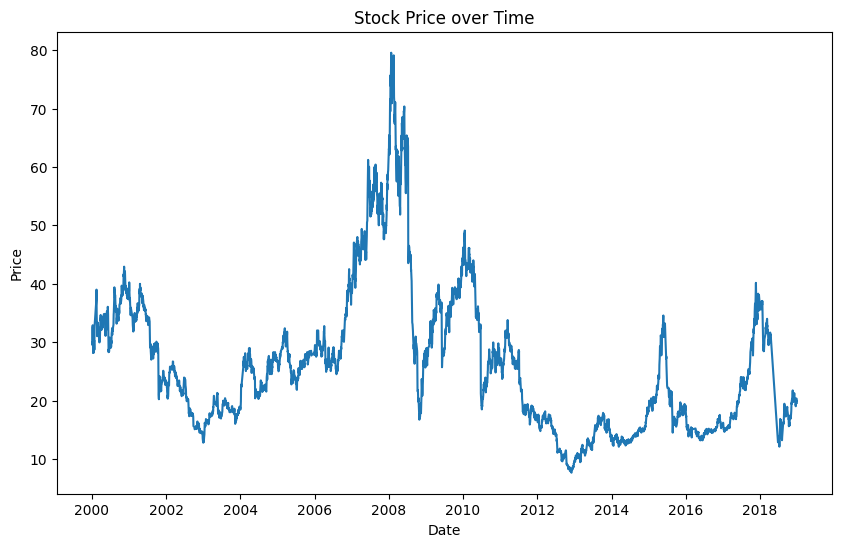

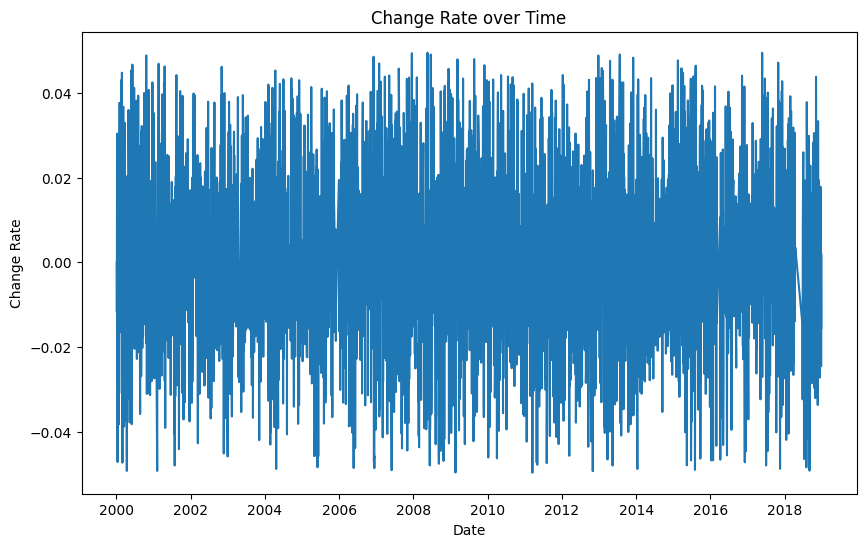

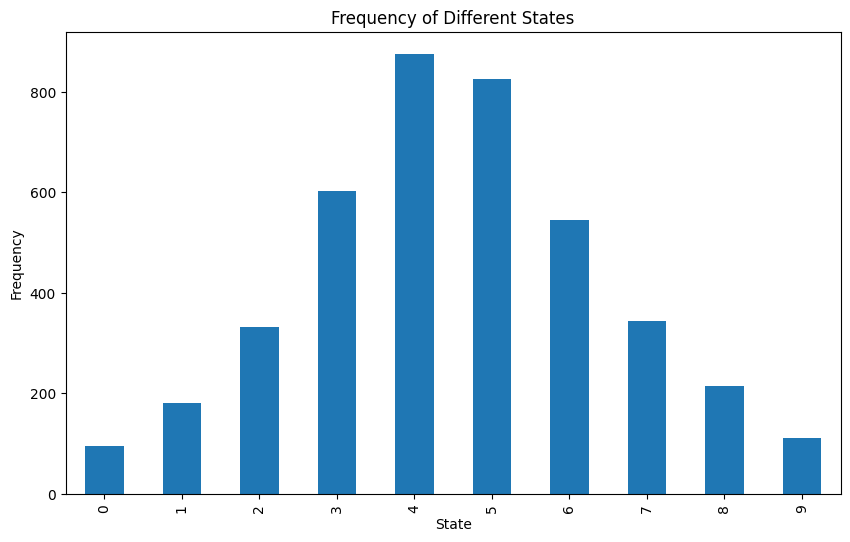

In [3]:
# 计算价格变化百分比
dataset['change'] = dataset['close'].pct_change()
# 补充缺失值
dataset = dataset.fillna(0)
# 去除异常值
dataset = dataset[abs(dataset['change'])<=0.05]

# 数据离散化
bins = np.arange(-0.05, 0.06, 0.01)
labels = range(len(bins)-1)
# 标记涨跌状态
dataset['state'] = pd.cut(dataset['change'], bins=bins, labels=labels)

# 划分训练集测试集
dataset['date'] = pd.to_datetime(dataset['date'])
train_dataset = dataset[dataset['date'].dt.year < 2019]
validation_dataset = dataset[dataset['date'].dt.year >= 2019]

print(train_dataset[['date', 'change', 'state']])
print(validation_dataset[['date', 'change', 'state']])

# 股价随时间的变化
plt.figure(figsize=(10,6))
plt.plot(train_dataset['date'], train_dataset['close'])
plt.title('Stock Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# 变化率随时间的变化
plt.figure(figsize=(10,6))
plt.plot(train_dataset['date'], train_dataset['change'])
plt.title('Change Rate over Time')
plt.xlabel('Date')
plt.ylabel('Change Rate')
plt.show()

# 不同涨跌状态的频数
plt.figure(figsize=(10,6))
train_dataset['state'].value_counts().sort_index().plot(kind='bar')
plt.title('Frequency of Different States')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show()

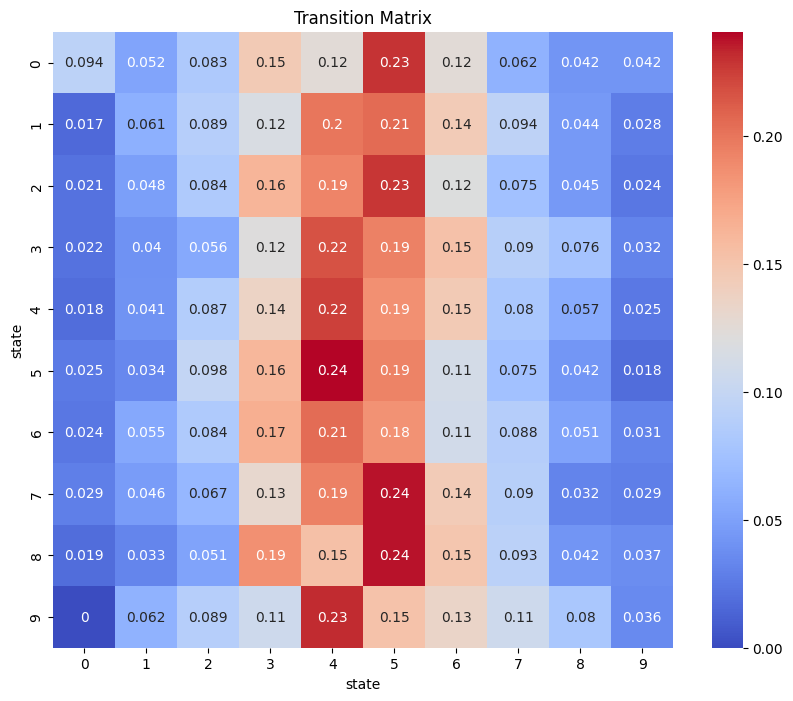

In [4]:
# 转移频率统计
transition_matrix = pd.crosstab(index=train_dataset['state'],columns=train_dataset['state'].shift(1),normalize='index')
# 转移矩阵可视化
plt.figure(figsize=(10,8))
sns.heatmap(transition_matrix, cmap='coolwarm', annot=True)
plt.title('Transition Matrix')
plt.show()

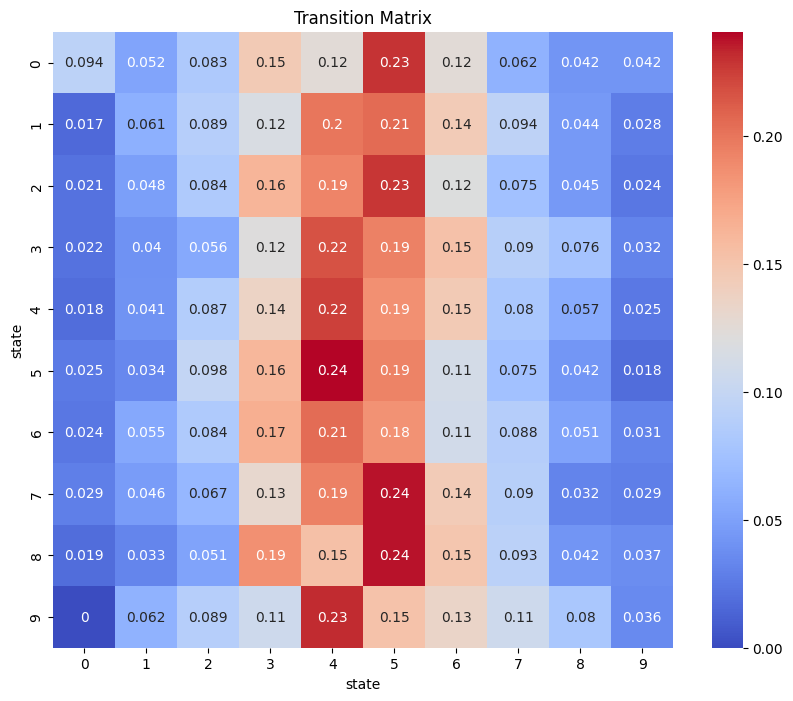

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(transition_matrix, cmap='coolwarm', annot=True)
plt.title('Transition Matrix')
plt.show()

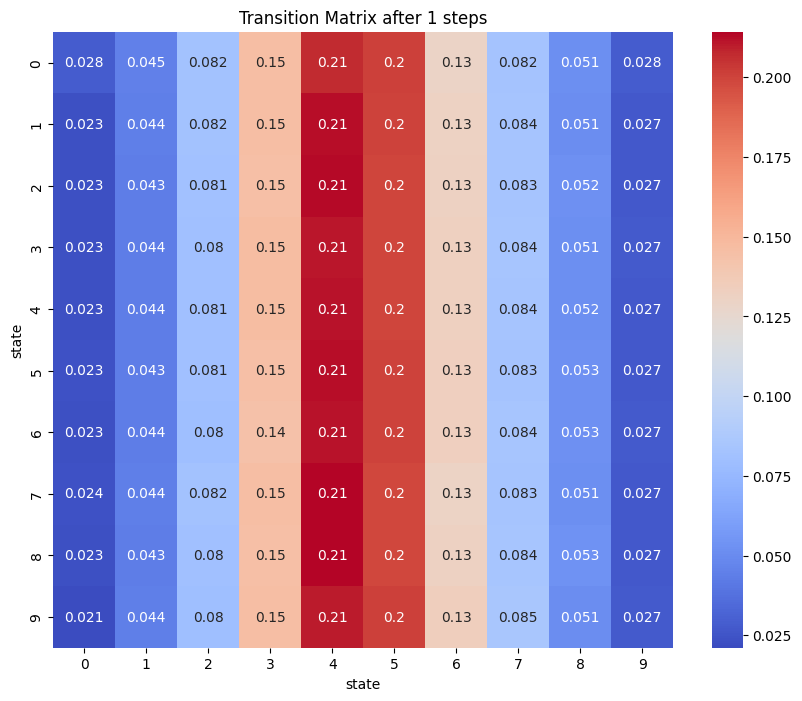

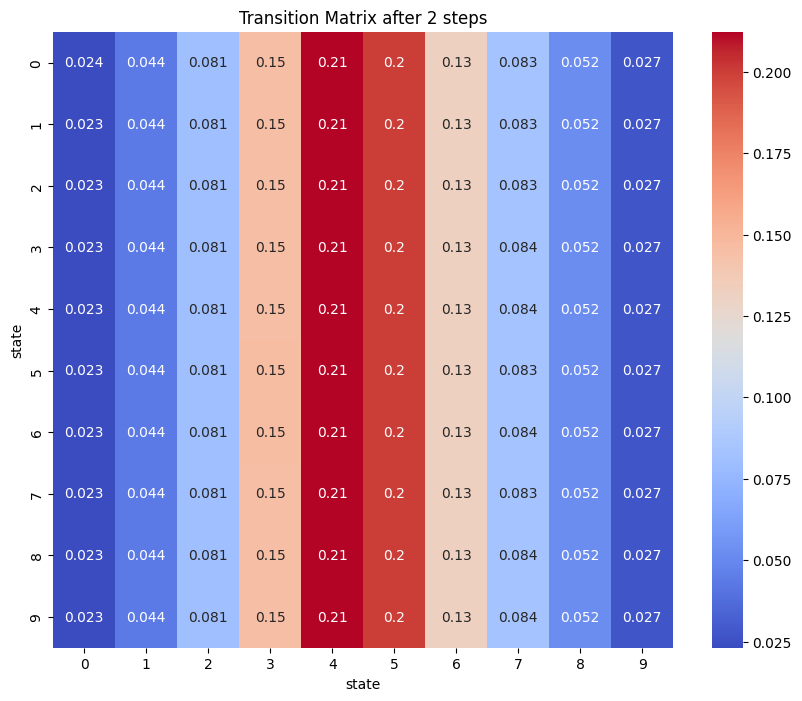

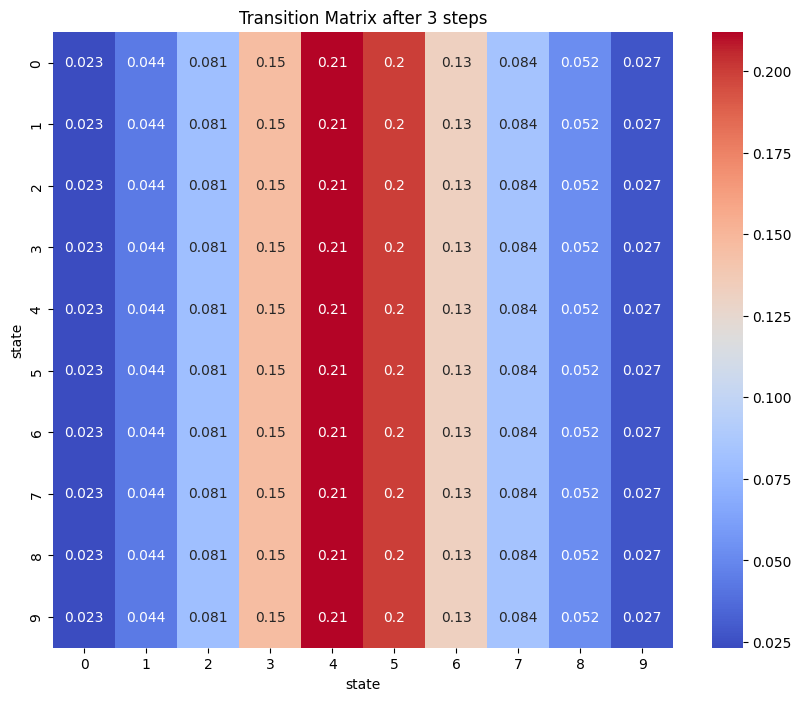

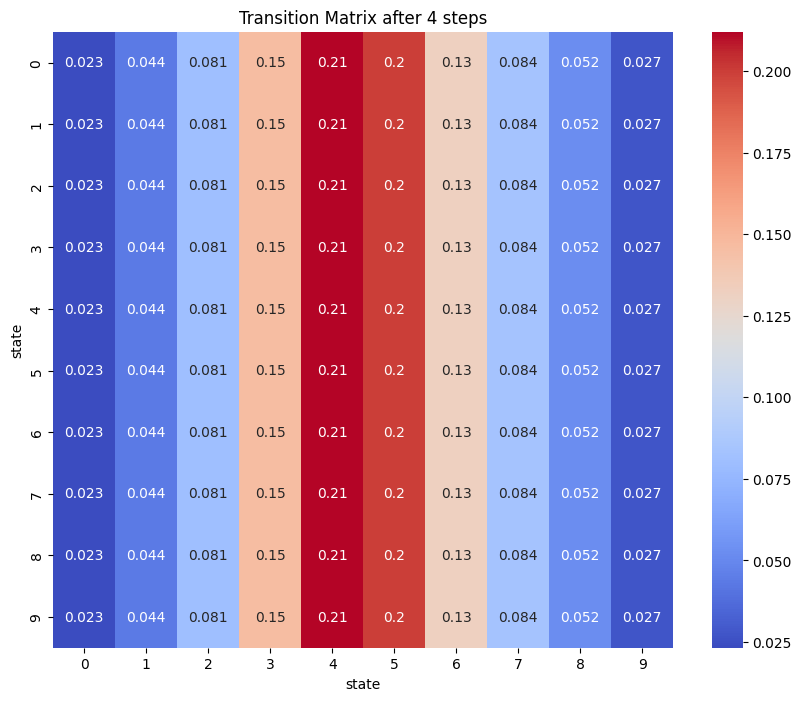

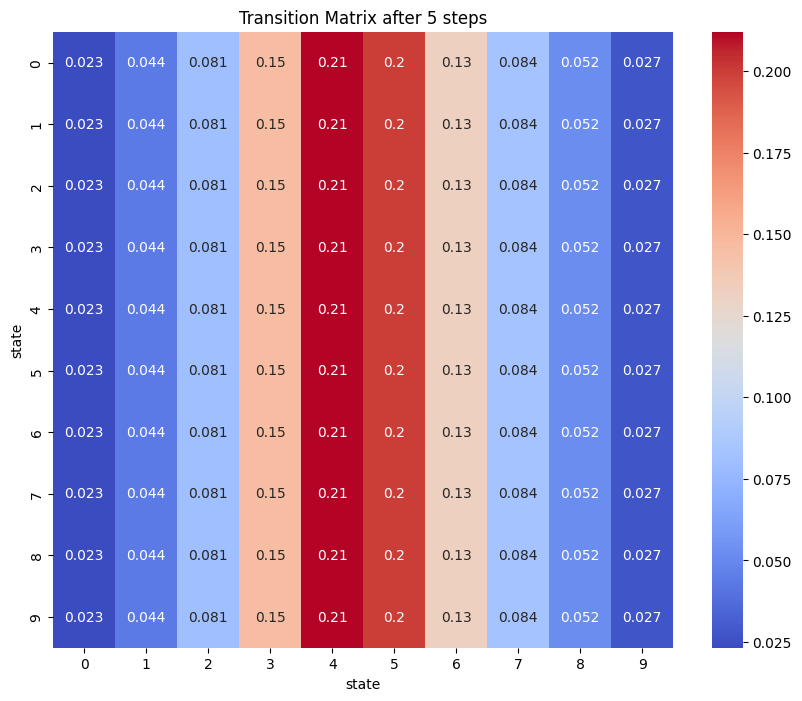

In [6]:
# 转移矩阵收敛实验
n_steps = 5
current_matrix = transition_matrix.copy()
for step in range(n_steps):
    current_matrix = current_matrix.dot(transition_matrix)
    if step % 1 == 0:
        plt.figure(figsize=(10,8))
        sns.heatmap(current_matrix, cmap='coolwarm', annot=True)
        plt.title('Transition Matrix after {} steps'.format(step+1))
        plt.show()

           date    change state
0    2000-01-04  0.000000    10
1    2000-01-05 -0.011710     7
4    2000-01-10  0.012000    12
7    2000-01-13 -0.010249     7
8    2000-01-14 -0.028650     4
...         ...       ...   ...
4440 2018-12-20  0.017876    13
4441 2018-12-21 -0.006198     8
4444 2018-12-26 -0.024558     5
4445 2018-12-27  0.002014    10
4446 2018-12-28 -0.015578     6

[3929 rows x 3 columns]
           date    change state
4447 2019-01-02 -0.001531     9
4448 2019-01-03 -0.039877     2
4449 2019-01-04  0.022364    14
4450 2019-01-07  0.042708    18
4451 2019-01-08 -0.005994     8
...         ...       ...   ...
4686 2019-12-25  0.019022    13
4687 2019-12-26  0.004444    10
4688 2019-12-27 -0.007670     8
4689 2019-12-30  0.021106    14
4690 2019-12-31  0.030277    16

[214 rows x 3 columns]


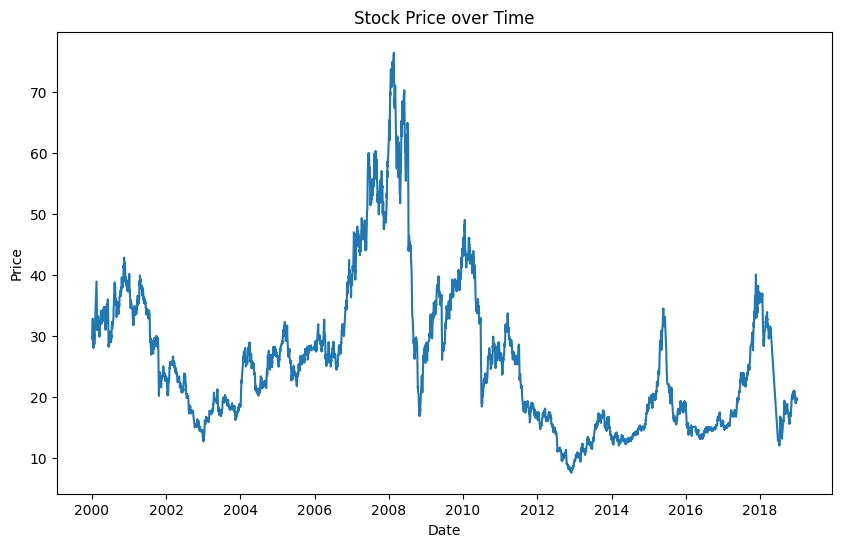

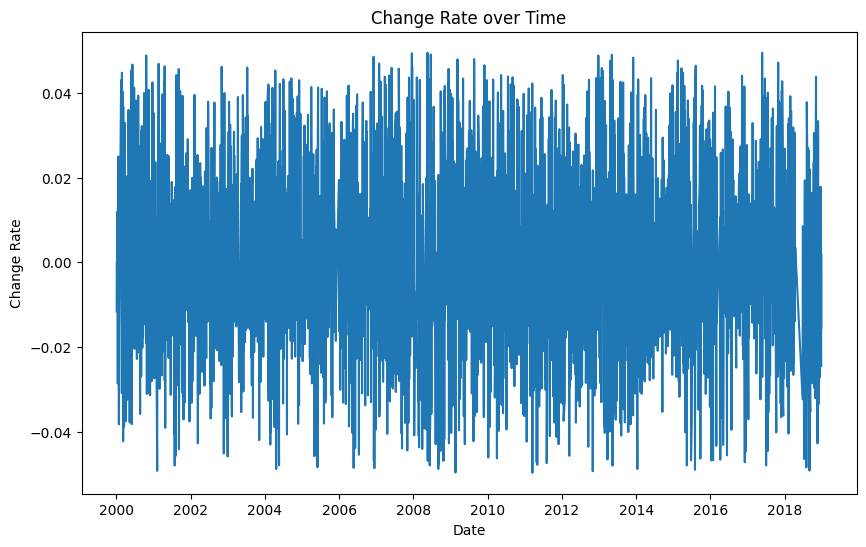

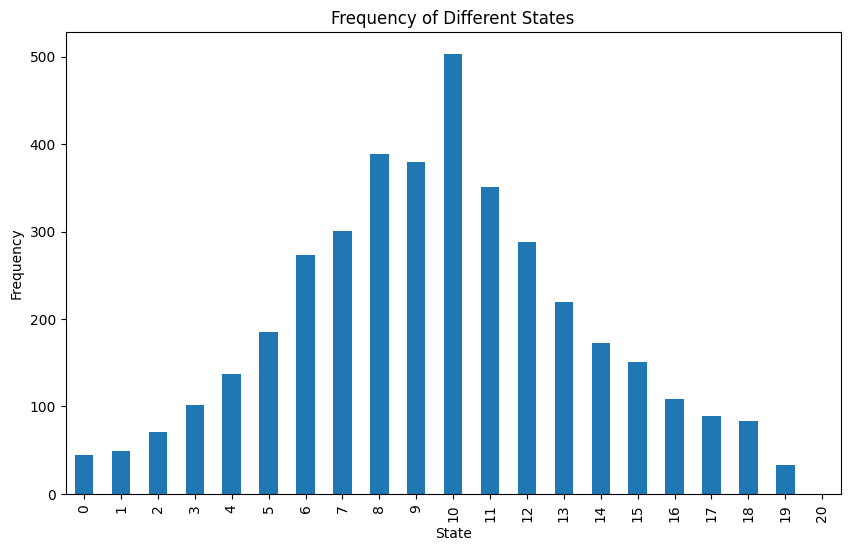

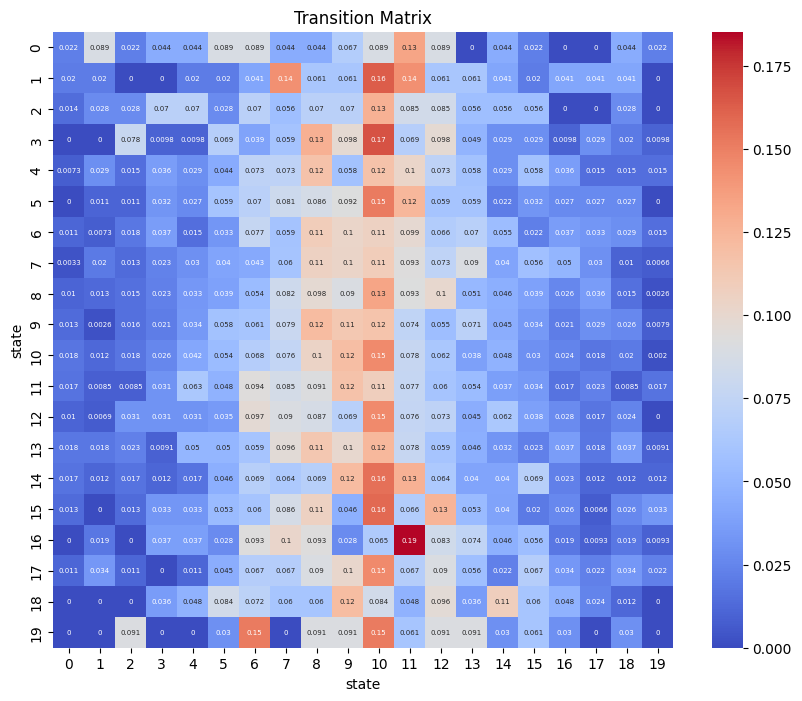

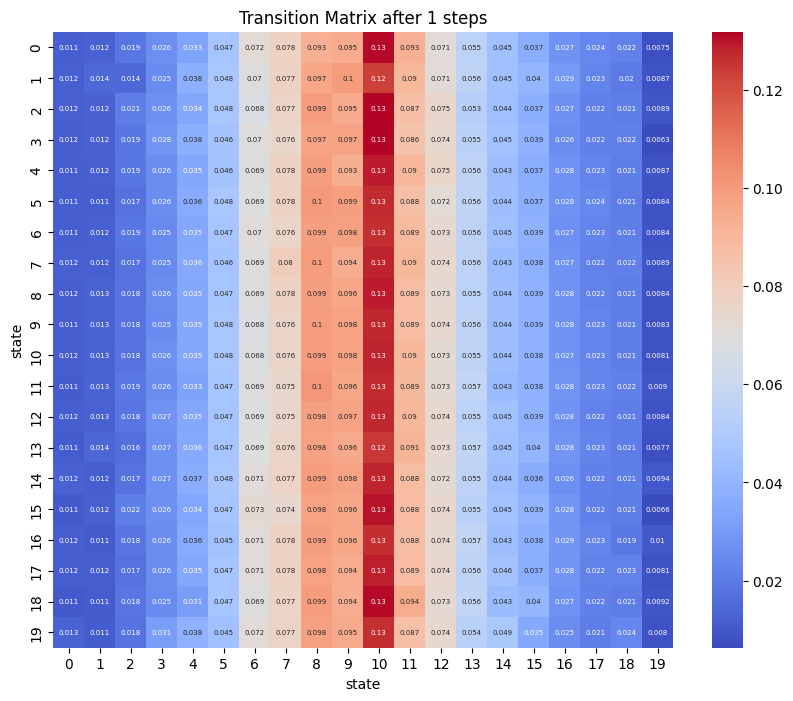

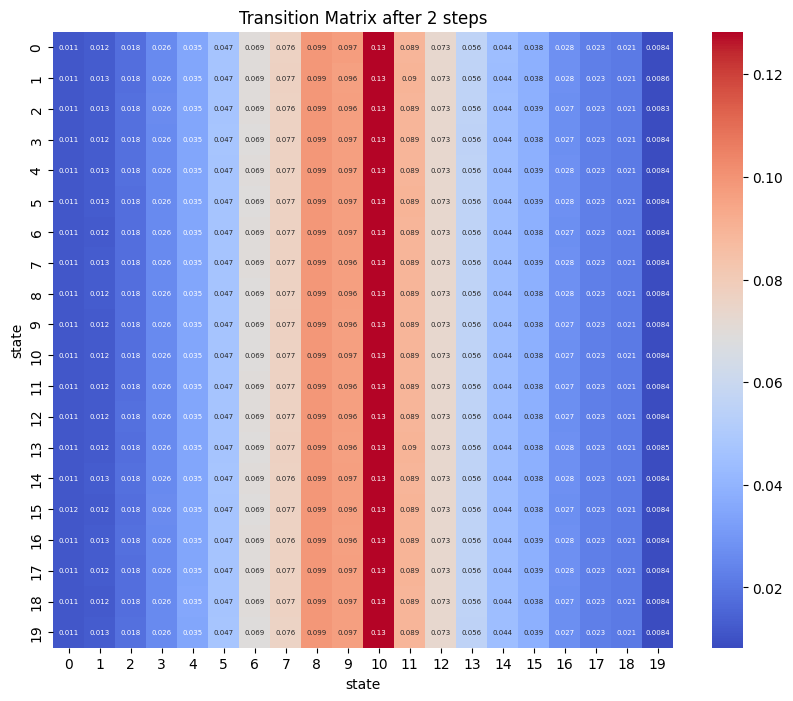

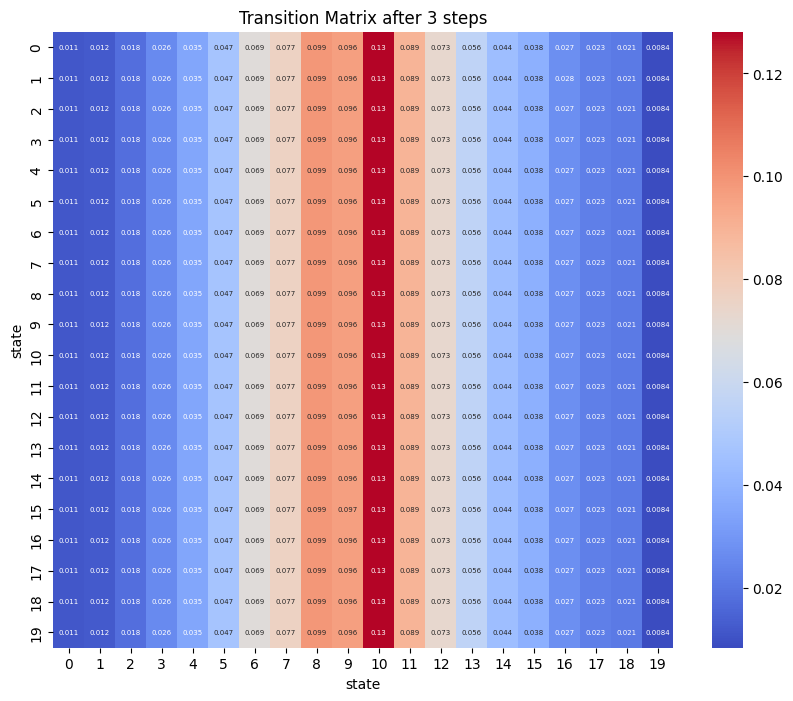

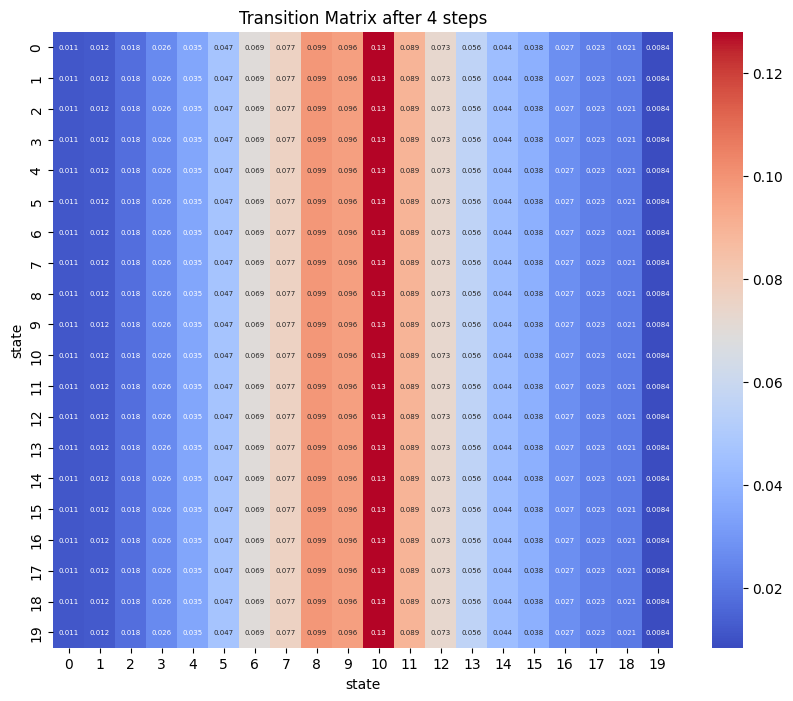

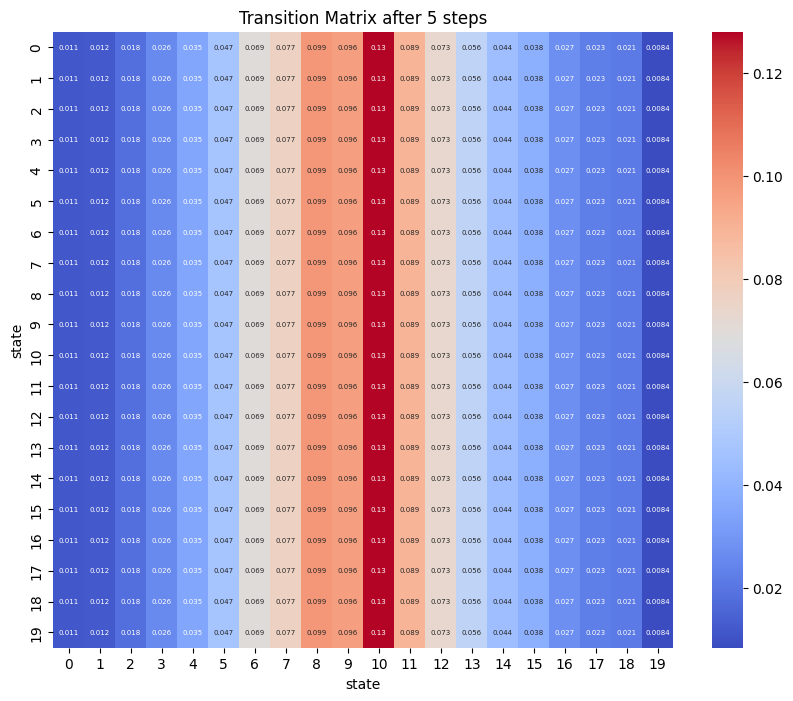

In [7]:
# 计算价格变化百分比
dataset['change'] = dataset['close'].pct_change()
# 补充缺失值
dataset = dataset.fillna(0)
# 去除异常值
dataset = dataset[abs(dataset['change'])<=0.05]

# 数据离散化
bins = np.arange(-0.05, 0.06, 0.005)
labels = range(len(bins)-1)
# 标记涨跌状态
dataset['state'] = pd.cut(dataset['change'], bins=bins, labels=labels)

# 划分训练集测试集
dataset['date'] = pd.to_datetime(dataset['date'])
train_dataset = dataset[dataset['date'].dt.year < 2019]
validation_dataset = dataset[dataset['date'].dt.year >= 2019]

print(train_dataset[['date', 'change', 'state']])
print(validation_dataset[['date', 'change', 'state']])

# 股价随时间的变化
plt.figure(figsize=(10,6))
plt.plot(train_dataset['date'], train_dataset['close'])
plt.title('Stock Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# 变化率随时间的变化
plt.figure(figsize=(10,6))
plt.plot(train_dataset['date'], train_dataset['change'])
plt.title('Change Rate over Time')
plt.xlabel('Date')
plt.ylabel('Change Rate')
plt.show()

# 不同涨跌状态的频数
plt.figure(figsize=(10,6))
train_dataset['state'].value_counts().sort_index().plot(kind='bar')
plt.title('Frequency of Different States')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show()

# 转移频率统计
transition_matrix = pd.crosstab(index=train_dataset['state'],columns=train_dataset['state'].shift(1),normalize='index')
# 转移矩阵可视化
plt.figure(figsize=(10,8))
sns.heatmap(transition_matrix, cmap='coolwarm', annot=True, annot_kws={'size': 5})
plt.title('Transition Matrix')
plt.show()

# 转移矩阵收敛实验
n_steps = 5
current_matrix = transition_matrix.copy()
for step in range(n_steps):
    current_matrix = current_matrix.dot(transition_matrix)
    if step % 1 == 0:
        plt.figure(figsize=(10,8))
        sns.heatmap(current_matrix, cmap='coolwarm', annot=True, annot_kws={'size': 5})
        plt.title('Transition Matrix after {} steps'.format(step+1))
        plt.show()